# KMeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Bank_notes=pd.read_csv("Bankdata_authentication.csv")

In [3]:
Bank_notes.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [4]:
Bank_notes.describe()

,variance,skewness,curtosis,entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [5]:
Bank_notes.shape

(1372, 5)

In [6]:
Bank_notes.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Class       0
dtype: int64

In [7]:
Bank_notes.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
Class         int64
dtype: object

In [8]:
Bank_notes.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'Class'], dtype='object')

In [9]:
Bank_notes.corr()

,variance,skewness,curtosis,entropy,Class
variance,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


<AxesSubplot:>

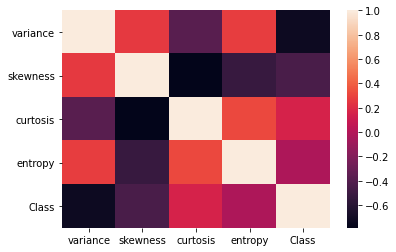

In [10]:
sns.heatmap(Bank_notes.corr())

In [11]:
X=Bank_notes.drop("Class",axis=1)

In [12]:
from sklearn.preprocessing import StandardScaler
sta_sca=StandardScaler()
scaled=sta_sca.fit_transform(X)
print(scaled)

[[ 1.12180565  1.14945512 -0.97597007  0.35456135]
 [ 1.44706568  1.06445293 -0.89503626 -0.12876744]
 [ 1.20780971 -0.77735215  0.12221838  0.61807317]
 ...
 [-1.47235682 -2.62164576  3.75901744 -0.75488418]
 [-1.40669251 -1.75647104  2.552043   -0.04315848]
 [-1.04712236 -0.43982168  0.29861555  1.1364645 ]]


In [13]:
X = pd.DataFrame(scaled)
X

,0,1,2,3
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [14]:
scaled=pd.DataFrame(scaled)

In [15]:
scaled

,0,1,2,3
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [16]:
scaled_columns=['variance', 'skewness', 'curtosis', 'entropy']

In [17]:
X

,0,1,2,3
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587
...,...,...,...,...
1367,-0.009711,-0.097693,-0.660962,0.300996
1368,-0.641313,-1.158984,1.179023,0.730127
1369,-1.472357,-2.621646,3.759017,-0.754884
1370,-1.406693,-1.756471,2.552043,-0.043158


In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,init="k-means++")
y_pred=kmeans.fit_predict(X)

In [19]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [36]:
scaled["cluster"]=y_pred
scaled.head()


,0,1,2,3,cluster
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,1
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,1


In [41]:
scaled.cluster.value_counts()

1    707
0    665
Name: cluster, dtype: int64

In [25]:
kmeans.score(X)

-3453.369343011731

In [26]:
scaled_columns=['variance', 'skewness', 'curtosis', 'entropy']

No handles with labels found to put in legend.


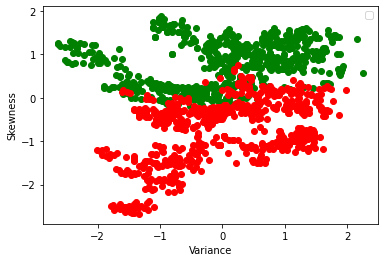

In [27]:
df1=scaled[scaled.cluster==0]
df2=scaled[scaled.cluster==1]
plt.scatter(df1[0],df1[1],color="green")
plt.scatter(df2[0],df2[1],color="red")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.legend()

In [28]:
kmeans.cluster_centers_

array([[ 0.04294905,  0.80146411, -0.6862497 , -0.67254114],
       [-0.04063407, -0.75826463,  0.64926036,  0.63629069]])

In [29]:
kmeans.inertia_

3453.369343011731

In [30]:
sum_of_squared=[]
k=range(1,15)
for i in k:
    kmeans1=KMeans(n_clusters=i)
    kmeans1.fit(scaled)
    sum_of_squared.append(kmeans1.inertia_)

In [31]:
sum_of_squared

[5830.678571428576,
 3453.346304717826,
 2546.7541841519474,
 1956.0062849801711,
 1632.2275011639363,
 1402.1228058687648,
 1202.4100931328685,
 1042.2737686981839,
 968.8869164687317,
 903.287824159485,
 837.9412640550976,
 782.7265019105424,
 718.9942253525827,
 668.0574223459761]

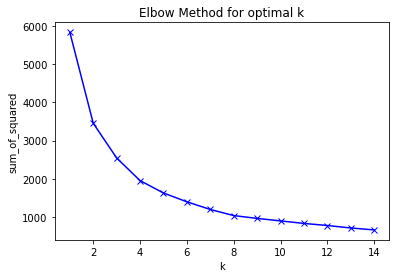

In [32]:
plt.plot(k,sum_of_squared,'bx-')
plt.xlabel('k')
plt.ylabel("sum_of_squared")
plt.title("Elbow Method for optimal k")
plt.show()